## 신경망이란?
뇌가 신호(정보)를 처리하는 과정 : '뉴런'을 이용한 전달, 뉴런에서 다음 뉴런으로 전달될 때 기준치(역치)에 따라 다음 뉴런으로 전달될지 말지가 결정됨.
* 이러한 인류의 신경망 구조를 본따 `Perceptron`이 만들어졌다.
* Perceptron이 `deep`해졌을 때 Artificial Neural Network라고 부른다.
* 즉, NN은 뇌의 복잡한 구조(`deep`)와 기준치(`Activation`)을 모방하였다.

## MNIST Recap
MNIST를 CNN이 아닌 MLP(Multi-Layer Perceptron)으로 구현.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])
print(x_train.shape)
print(x_train_reshaped.shape)

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

(60000, 28, 28)
(60000, 784)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.4856 - accuracy: 0.8846
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2285 - accuracy: 0.9362
Epoch 3/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.1774 - accuracy: 0.9502
Epoch 4/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.1465 - accuracy: 0.9584
Epoch 5/10
1875/1875 [==============================] - 2s 859us/step -

## Parameters
Input layer - Hidden layer - Output layer 사이에는 `Matrix`가 존재한다.
* 입력값이 100개, Hidden units이 20개라면 matrix는 (`100X20`)
* **입력값 = input features**
* **Output units = Class의 개수**
    * MNIST의 경우 0~9까지의 손글씨를 맞추기 위한 10개의 class를 갖는다. 따라서 Output layer의 노드 개수도 10개여야 한다.

In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


* Weight는 random 초기화한다.
* Bias는 0으로 초기화한다.

In [4]:
# 첫번째 데이터의 Hidden layer 출력
a1[1]

array([-1.12831986,  0.34757652, -0.81301709,  2.0460106 ,  0.75304647,
       -0.03662706,  0.48098521, -0.8799753 ,  0.92093218, -0.52273404,
        0.07658515,  0.52664203, -0.88749939, -0.17171376, -0.66168775,
       -0.5954174 , -0.36591207, -1.59778276, -0.38993008,  0.05776485,
       -0.29032406,  0.03750873, -1.48661119, -1.66072379,  0.01230781,
       -1.71820746, -0.54095696,  1.18472006,  1.53210678,  0.69532812,
       -0.17996927, -1.89194452,  2.32141671, -1.00209592,  0.80715389,
       -1.59161504, -0.53183858, -1.03156617, -0.00655425, -1.85682022,
        2.84724928, -0.1623452 , -0.50999526, -0.28819892, -1.15618421,
        0.23364065,  0.65463123,  0.43204832, -1.13997936, -1.25071436])

## Activation function
활성화 함수는 보통 비선형 함수를 사용합니다. 그리고 이 비선형 함수를 MLP 안에 포함시키면서 모델의 표현력이 좋아지게 됩니다. (정확히는 이 비선형 함수가 포함되지 않으면 한 층을 가진 MLP와 다른 점이 없습니다.)
* Activation function : 신호를 다음 노드로 전달할지 말지를 결정하는 기준.
* 종류로는 sigmoid, tanh, ReLU가 있다.

### Sigmoid
* 0 < y < 1
* Gradient Vanising 현상 발생
    * sigmoid 함수를 미분하면 최댓값이 0.25인 종 모양 함수
    * 따라서 네트워크가 깊어질수록 gradient가 0에 수렴한다.
* exp 함수를 사용해야 하므로 비용이 크다.

In [5]:
# sigmoid : 모든 출력이 0에서 1 사이에 있다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 엘리먼트가 0에서 1사이

[0.30291534 0.44216793 0.49734126 0.90439522 0.61115838 0.60334965
 0.6519585  0.64564723 0.6183623  0.55413041 0.63504549 0.38184895
 0.54433687 0.20812708 0.50532092 0.35982128 0.3933777  0.38974585
 0.20156665 0.73687565 0.21559446 0.66738357 0.38874714 0.23166733
 0.29512427 0.2952574  0.59110883 0.49975218 0.46640569 0.55968207
 0.25433403 0.11184761 0.69451557 0.2750759  0.77406099 0.22735713
 0.34128596 0.60039114 0.18518251 0.10241665 0.90851238 0.59558342
 0.55874138 0.34120135 0.59559928 0.30798125 0.37463389 0.6286468
 0.28487678 0.48928369]


### Tanh
* -1 < y < 1
* x의 중심값이 0이므로 sigmoid의 최적화 과정이 느려지는 것을 개선하였다.
* sigmoid보다는 낫지만, 여전히 gradient vanising 문제가 존재한다.
    * 도함수는 최댓값이 1인 종모양

### ReLU(Rectified Linear Unit)
```f(x) = max(0,x)```
* 학습이 빠르다.
* 연산 비용이 크지 않고, 구현이 매우 간단하다.
* 값이 0인지 x인지를 가르는 x값(기준치)를 `bias`라고 한다.

In [6]:
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [7]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)# z1이 두번째 레이어의 입력 

print(W2.shape)
print(b2.shape)
print(a2[0])  # 최종 출력이 output_size만큼의 벡터
print(a1.shape)
print(a2.shape)

(50, 10)
(10,)
[-0.52482879 -0.44454289  0.51597302  0.36153058  0.51744031 -0.5423958
  0.02821237 -0.14005742  0.30282657  0.62381208]
(5, 50)
(5, 10)


In [8]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [9]:
y_hat = softmax(a2) # output layer의 출력(모델의 예측값)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.05048145, 0.05470154, 0.14293755, 0.12248215, 0.14314743,
       0.04960239, 0.08776363, 0.0741713 , 0.11549894, 0.15921362])

## Loss function
Activation function을 거쳐 신호들은 Output layer로 전달된다. Output layer의 출력을 예측값(predict value)라 하고, 실제 정답과 모델의 예측값 차이를 계산하고, 이 차이를 줄이기 위해 각 파라미터들을 조정(update)하는 것이 딥러닝의 전체적인 학습 흐름이다.
* loss function(cost function) : 정답과 예측값의 차이를 구하는데 사용되는 함수.
    * MSE(Mean Square Error)
    * Cross Entropy : 두 확률분포 사이의 유사도가 클수록 작아진다.

In [10]:
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
print(y_hat[0])
print(t[0])

[0.05048145 0.05470154 0.14293755 0.12248215 0.14314743 0.04960239
 0.08776363 0.0741713  0.11549894 0.15921362]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.5531880175808794

## Gradient descent
앞서 구한 오차(cost function의 크기)를 줄이기 위한 방법.
* 파라미터 W의 변화에 따른 Loss의 변화량을 구하고, 변화량의 기울기가 커지는 방향의 반대 방향으로 파라미터를 조정한다.
* learning rate
* parameter 초기화(가중치 초기화)를 어떻게 하는가

In [14]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num # dy = aLoss/ay 
dy # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01009629,  0.01094031,  0.02858751,  0.02449643,  0.02862949,
        -0.19007952,  0.01755273,  0.01483426,  0.02309979,  0.03184272],
       [-0.18808169,  0.01078796,  0.02309842,  0.02561775,  0.03444927,
         0.01311046,  0.01704825,  0.01725052,  0.02182259,  0.02489647],
       [ 0.0122521 ,  0.01207237,  0.0270282 ,  0.02440747, -0.17451958,
         0.00978173,  0.01527889,  0.01237196,  0.03185732,  0.02946954],
       [ 0.01136235, -0.18930368,  0.02344259,  0.02427268,  0.02640512,
         0.01246232,  0.02045353,  0.01299459,  0.0237139 ,  0.03419661],
       [ 0.01202621,  0.01018632,  0.0263293 ,  0.0288923 ,  0.0286584 ,
         0.01003091,  0.01818529,  0.01425135,  0.02307482, -0.1716349 ]])

In [15]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.0799581 , -0.06475592,  0.05796333,  0.05862593,  0.01493084,
        -0.06561424,  0.04064943,  0.03315821,  0.05425917, -0.04925866],
       [-0.03051291, -0.0880585 ,  0.06828091,  0.06866656, -0.05598372,
        -0.03149511,  0.04712121,  0.03693435,  0.06691783, -0.08187063],
       [-0.03205152, -0.02401525,  0.02942202,  0.03053923, -0.00852774,
        -0.00028206,  0.02049704,  0.01655235,  0.02830704, -0.06044111],
       [-0.10603798, -0.03740176,  0.07387233,  0.0726809 , -0.05884223,
        -0.09520884,  0.0494635 ,  0.04138683,  0.07148065, -0.0113934 ],
       [-0.09932118, -0.06983181,  0.0958936 ,  0.0940193 , -0.05113742,
        -0.14813035,  0.06463006,  0.05305838,  0.09148579, -0.03066637],
       [-0.04592732, -0.05257281,  0.06690448,  0.0656894 , -0.08515763,
        -0.0625648 ,  0.04469118,  0.03607025,  0.0660754 , -0.03320815],
       [-0.03479075, -0.08303419,  0.05560139,  0.05478303,  0.00814077,
        -0.09701377,  0.03877094,  0.0306772 

In [16]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [17]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [18]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [19]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## Backpropagation
Gradient descent로 구한 기울기를 어떻게 Input layer로 전달하여 파라미터를 조정(update)할 수 있을까?

In [20]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [21]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.11463054 0.09170069 0.13077456 0.14760841 0.06674502 0.05200574
  0.12955146 0.09364097 0.08071439 0.09262822]
 [0.1239482  0.10251724 0.104672   0.13336732 0.07814976 0.05839971
  0.1632073  0.07743007 0.06951684 0.08879158]
 [0.10644494 0.09244442 0.10417061 0.13198127 0.06393785 0.06586027
  0.13572441 0.10823544 0.09101706 0.10018372]
 [0.10352318 0.10985384 0.11111911 0.14674458 0.07169492 0.06643063
  0.13309173 0.09122061 0.07689639 0.08942499]
 [0.12456173 0.09529779 0.0826805  0.13808148 0.07024826 0.04940456
  0.15837034 0.10701631 0.08104583 0.09329319]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4749498194725765


## Test
Parameter 업데이트에 따라 점점 Loss가 줄어드는지(점점 정확한 추론을 하는지) 확인

In [24]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        #print(y_hat)
        #print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [25]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
Loss:  2.220537379545103
---------
Loss:  2.0669041564253834
---------
Loss:  1.9433594927873217
---------
Loss:  1.8416144508680652
---------
Loss:  1.755732849112722


## 모델 예측과 정확도 계산

In [26]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [27]:
# 100가지 train example을 가지고 추론
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.14688295, 0.13141848, 0.03871126, 0.04784663, 0.12237008,
       0.20813865, 0.06576103, 0.0535397 , 0.04032806, 0.14500315])

In [29]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
   # t = np.argmax(t, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [30]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_ont_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.14688295 0.13141848 0.03871126 0.04784663 0.12237008 0.20813865
 0.06576103 0.0535397  0.04032806 0.14500315]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.07


## 전체 데이터셋에 적용

In [31]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [32]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3022694078249204
train acc, test acc | 0.12318333333333334, 0.1276
Loss:  0.8408604072788957
train acc, test acc | 0.7795333333333333, 0.7876
Loss:  0.4812913531638655
train acc, test acc | 0.877, 0.881
Loss:  0.3950979391261163
train acc, test acc | 0.8982166666666667, 0.9002
Loss:  0.3256717561976253
train acc, test acc | 0.9064166666666666, 0.9088
Loss:  0.31560265592061737
train acc, test acc | 0.9130666666666667, 0.9154
Loss:  0.21562401508609486
train acc, test acc | 0.9179, 0.9208
Loss:  0.23268433502655378
train acc, test acc | 0.9234666666666667, 0.9236
Loss:  0.2647695324778799
train acc, test acc | 0.9274666666666667, 0.9288
Loss:  0.18977848194727445
train acc, test acc | 0.9312833333333334, 0.9289
Loss:  0.3957356110034976
train acc, test acc | 0.9341666666666667, 0.9347
Loss:  0.2600388744951183
train acc, test acc | 0.9368666666666666, 0.9368
Loss:  0.15548599243614947
train acc, test acc | 0.93955, 0.939
Loss:  0.27416209294020794

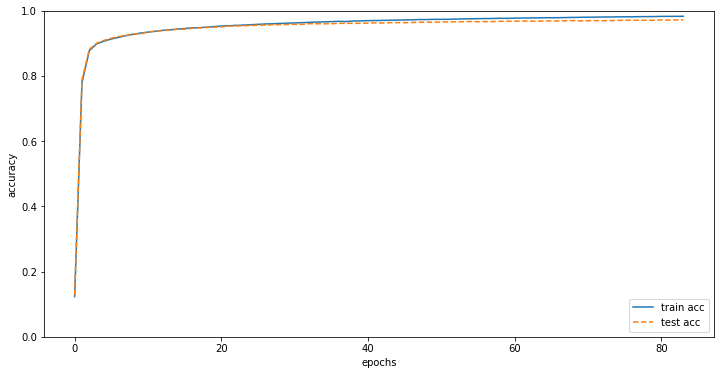

In [33]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

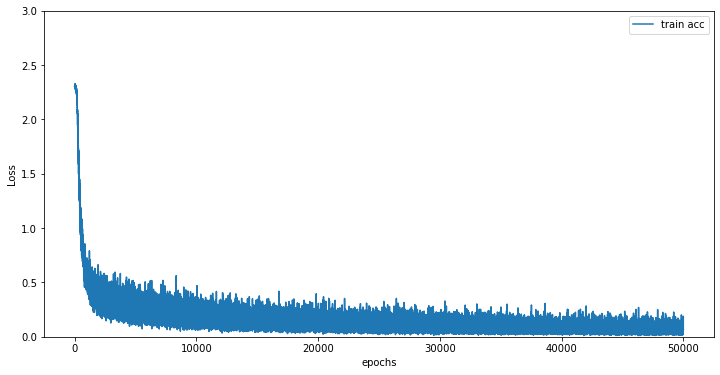

In [34]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()